# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Thiago Henrique Gomes Panini

#### RA

11016214

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [2]:
from sklearn.datasets import load_digits
digits_dataset = load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [4]:
type(digits_dataset)

sklearn.utils.Bunch

In [5]:
digits_dataset

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [7]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [8]:
type(digits_img)

numpy.ndarray

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [10]:
digits_img

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [41]:
### INSIRA AQUI O CÓDIGO ###
import matplotlib.pyplot as plt
% matplotlib inline

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

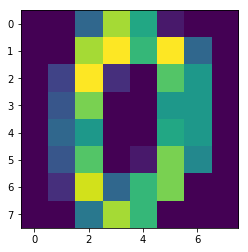

In [117]:
### INSIRA AQUI O CÓDIGO ###
plt.imshow(digits_img[0]);

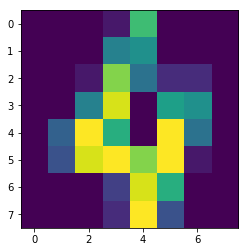

In [118]:
plt.imshow(digits_img[4]);

In [ ]:
import numpy as np

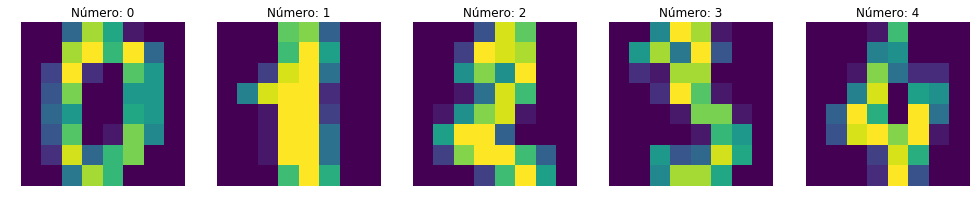

In [93]:
# Imprimindo as primeiras imagens do dataset (ou do ndarray)
i = 0
fig, ax = plt.subplots(1, 5, figsize=(17, 5))
for axe in ax:
    axe.imshow(digits_img[i])
    axe.set_title(f'Número: {str(i)}')
    i += 1
    axe.axis('off')

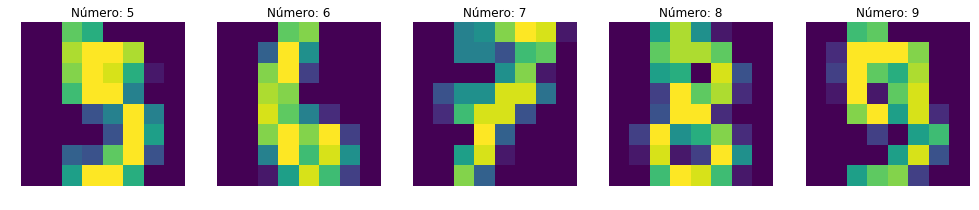

In [112]:
# Imprimindo as primeiras imagens do dataset (ou do ndarray)
i = 5
fig, ax = plt.subplots(1, 5, figsize=(17, 5))
for axe in ax:
    axe.imshow(digits_img[i])
    axe.set_title(f'Número: {str(i)}')
    i += 1
    axe.axis('off')

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [119]:
# Verificando antes da alteração
digits_img.shape

(1797, 8, 8)

In [125]:
# Tamanho do array
s = digits_img.shape
tam_array = s[0] * s[1] * s[2]
tam_array

115008

In [146]:
### INSIRA AQUI O CÓDIGO ###
import numpy as np

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [129]:
digits_img[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [157]:
### INSIRA AQUI O CÓDIGO ###
for image in digits_img:
    print(image.shape)

(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)

In [160]:
digits_test = np.reshape(digits_img, (digits_img.shape[0], 1, 64))

In [158]:
for image in digits_test:
    print(image.shape)

(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)


Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [161]:
### INSIRA AQUI O CÓDIGO ###
digits_test.shape

(1797, 1, 64)

In [162]:
digits_test[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [165]:
### INSIRA AQUI O CÓDIGO ###
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [166]:
### INSIRA AQUI O CÓDIGO ###
digits_target

array([0, 1, 2, ..., 8, 9, 8])

Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [167]:
### INSIRA AQUI O CÓDIGO ###
digits_target.shape

(1797,)

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [168]:
### INSIRA AQUI O CÓDIGO ###
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [169]:
### INSIRA AQUI O CÓDIGO ###
x_train, x_test, y_train, y_test = train_test_split(digits_test, digits_target, test_size=.25)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [170]:
### INSIRA AQUI O CÓDIGO ###
x_train.shape

(1347, 1, 64)

In [171]:
### INSIRA AQUI O CÓDIGO ###
x_test.shape

(450, 1, 64)

In [172]:
### INSIRA AQUI O CÓDIGO ###
y_train.shape

(1347,)

In [173]:
### INSIRA AQUI O CÓDIGO ###
y_test.shape

(450,)

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [174]:
### INSIRA AQUI O CÓDIGO ###
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [175]:
### INSIRA AQUI O CÓDIGO ###
knn = KNeighborsClassifier(n_neighbors=5)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [176]:
### INSIRA AQUI O CÓDIGO ###
knn.fit(x_train, y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [178]:
nsamples, nx, ny = x_train.shape
x2d_train = x_train.reshape((nsamples, nx*ny))

In [179]:
x_train.shape

(1347, 1, 64)

In [183]:
x2d_train

array([[ 0.,  0.,  3., ..., 14.,  4.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  8.,  0.,  0.],
       [ 0.,  0.,  2., ..., 15.,  8.,  0.],
       [ 0.,  1.,  9., ..., 10.,  1.,  0.]])

In [184]:
knn.fit(x2d_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [186]:
nsamples, nx, ny = x_test.shape
x2d_test = x_test.reshape((nsamples, nx*ny))

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [187]:
### INSIRA AQUI O CÓDIGO ###
y_pred = knn.predict(x2d_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [194]:
### INSIRA AQUI O CÓDIGO ###
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [191]:
### INSIRA AQUI O CÓDIGO ###
print(metrics.accuracy_score(y_test, y_pred))

0.9822222222222222


Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [195]:
### INSIRA AQUI O CÓDIGO ###
confusion_matrix(y_test, y_pred)

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  1],
       [ 0,  1,  0,  2,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 43]], dtype=int64)

### Decision Tree

#### Treinamento

In [196]:
### INSIRA AQUI O CÓDIGO ###
from sklearn import tree

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [197]:
### INSIRA AQUI O CÓDIGO ###
dt = tree.DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [198]:
### INSIRA AQUI O CÓDIGO ###
dt = dt.fit(x2d_train, y_train)

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [199]:
### INSIRA AQUI O CÓDIGO ###
y_pred = dt.predict(x2d_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [200]:
### INSIRA AQUI O CÓDIGO ###
print(metrics.accuracy_score(y_test, y_pred))

0.8444444444444444


Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [201]:
### INSIRA AQUI O CÓDIGO ###
confusion_matrix(y_test, y_pred)

array([[36,  0,  1,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 41,  1,  1,  3,  0,  0,  0,  1,  1],
       [ 0,  7, 34,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  1, 38,  1,  0,  0,  1,  2,  3],
       [ 0,  2,  2,  0, 40,  0,  1,  1,  0,  0],
       [ 0,  0,  1,  0,  2, 41,  0,  1,  0,  1],
       [ 0,  2,  0,  0,  3,  0, 39,  0,  0,  0],
       [ 0,  1,  1,  3,  0,  1,  0, 42,  0,  3],
       [ 0,  4,  2,  1,  0,  1,  0,  1, 32,  2],
       [ 0,  2,  0,  1,  0,  2,  0,  0,  1, 37]], dtype=int64)

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

ESCREVA AQUI A SUA RESPOSTA

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

ESCREVA AQUI A SUA RESPOSTA

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

ESCREVA AQUI A SUA RESPOSTA

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

ESCREVA AQUI A SUA RESPOSTA

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

ESCREVA AQUI A SUA RESPOSTA

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

ESCREVA AQUI A SUA RESPOSTA

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

ESCREVA AQUI A SUA RESPOSTA

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)